# Häslostudie


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
n_sim = 1000

health_study = pd.read_csv("data/health_study_dataset.csv")

columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
health_study[columns].describe()


,age,weight,height,systolic_bp,cholesterol
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,49.426250,73.413000,171.849250,149.178625,4.929150
std,14.501118,13.685059,9.804259,12.793360,0.848413
min,18.000000,33.700000,144.400000,106.800000,2.500000
25%,39.000000,64.800000,164.775000,140.900000,4.327500
50%,50.000000,73.200000,171.350000,149.400000,4.970000
75%,59.000000,82.600000,178.925000,157.600000,5.482500
max,90.000000,114.400000,200.400000,185.900000,7.880000


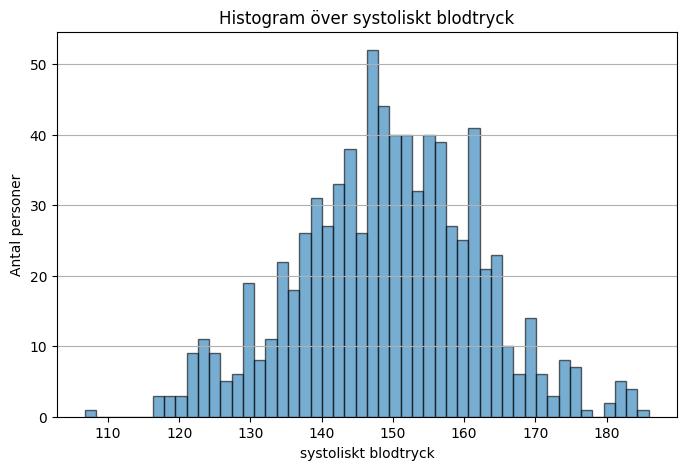

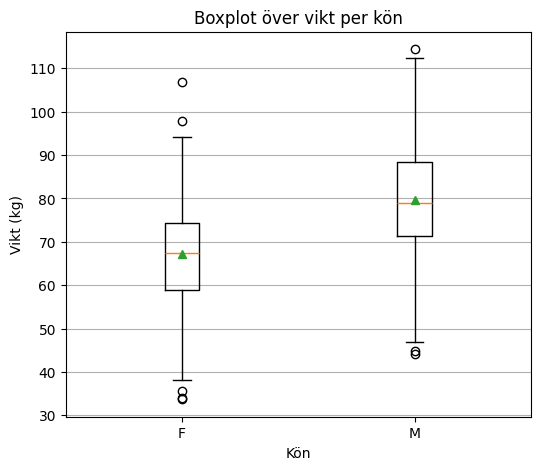

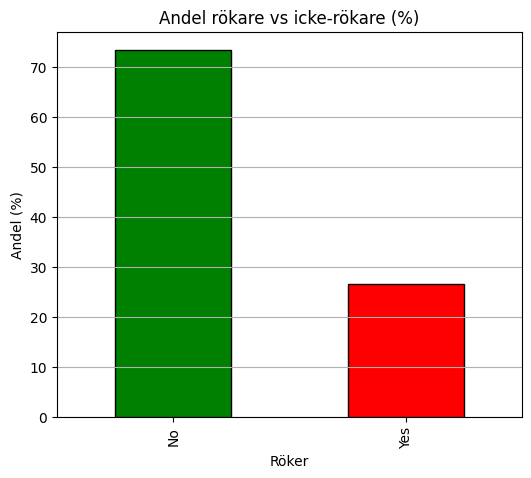

smoker
No     587
Yes    213
Name: count, dtype: int64


In [7]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(health_study["systolic_bp"], bins=50, edgecolor="black", alpha=0.6)
ax.set_title("Histogram över systoliskt blodtryck")
ax.set_xlabel("systoliskt blodtryck")
ax.set_ylabel("Antal personer")
ax.grid(True, axis="y")
plt.show()

# Boxplot över vikt per kön
female_weight = health_study.loc[health_study["sex"] == "F", "weight"]
male_weight   = health_study.loc[health_study["sex"] == "M", "weight"]

fig, ax = plt.subplots(figsize=(6,5))
ax.boxplot([female_weight, male_weight], tick_labels=["F", "M"], showmeans=True)
ax.set_title("Boxplot över vikt per kön")
ax.set_xlabel("Kön")
ax.set_ylabel("Vikt (kg)")
ax.grid(True, axis="y")
plt.show()

# Stapeldiagram över andelen rökare
"""
Här räknar vi ut hur många som röker och får fram en procentsats
"""
smoker_counts = health_study["smoker"].value_counts()
smoker_percent = smoker_counts / len(health_study) * 100

fig, ax = plt.subplots(figsize=(6,5))
smoker_percent.plot(kind="bar", color=["green", "red"], edgecolor="black")
ax.set_title("Andel rökare vs icke-rökare (%)")
ax.set_xlabel("Röker")
ax.set_ylabel("Andel (%)")
ax.grid(True, axis="y")
plt.show()
print(smoker_counts)

In [8]:
# Totalt antal personer
n_total = len(health_study)

# Antal personer med sjukdomen
n_disease = health_study['disease'].sum()

# Verklig sannolikhet
p_disease = n_disease / n_total
print(f"Andel med sjukdomen i datasetet: {p_disease:.3f}")

# Simulera 1000 personer: 1 = sjuk, 0 = frisk
simulated = np.random.binomial(1, p_disease, n_sim)

# Beräkna andelen i simuleringen
simulated_mean = simulated.mean()
print(f"Andel med sjukdomen i simuleringen: {simulated_mean:.3f}")

Andel med sjukdomen i datasetet: 0.059
Andel med sjukdomen i simuleringen: 0.056


Stickprovsmedelvärde: 149.18 mmHg
95% Konfidensintervall (Bootstrap): (148.34, 150.08) mmHg


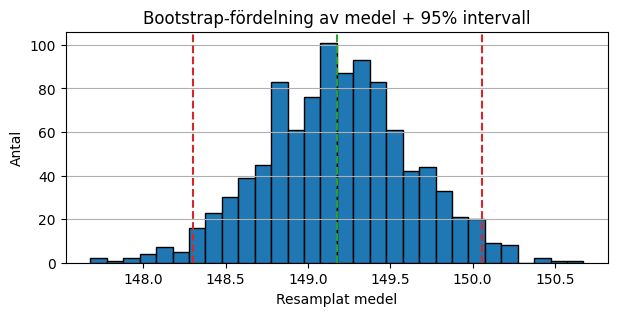

In [9]:
systolic_bp_clean = health_study["systolic_bp"].dropna()
def ci_mean_bootstrap(x, B=5000, confidence=0.95):
    x = np.asarray(x, dtype=float)
    n = len(x)
    boot_means = np.empty(B)
    for b in range(B):
        boot_sample = np.random.choice(x, size=n, replace=True)
        boot_means[b] = np.mean(boot_sample)
    
    alpha = (1 - confidence) / 2 # 2,5:e procentilen och 97.5:e procentilen
    lo, hi = np.percentile(boot_means,[100*alpha, 100*(1-alpha)])
    return float(lo), float(hi), float(np.mean(x))

blo, bhi, bmean= ci_mean_bootstrap(systolic_bp_clean)
(blo, bhi), bmean, ci_mean_bootstrap(systolic_bp_clean)

print(f"Stickprovsmedelvärde: {bmean:.2f} mmHg")
print(f"95% Konfidensintervall (Bootstrap): ({blo:.2f}, {bhi:.2f}) mmHg")

fig, ax = plt.subplots(figsize=(7, 3))

bm = np.array([np.mean(np.random.choice(systolic_bp_clean, size=len(systolic_bp_clean), replace=True)) for _ in range(1000)])

ax.hist(bm, bins=30, edgecolor="black")
ax.axvline(np.mean(systolic_bp_clean), color="tab:green", linestyle="--", label="Stickprovsmedel")
ax.axvline(np.percentile(bm, 2.5), color="tab:red", linestyle="--", label="2.5%")
ax.axvline(np.percentile(bm, 97.5), color="tab:red", linestyle="--", label="97.5%")
ax.set_title("Bootstrap-fördelning av medel + 95% intervall")
ax.set_xlabel("Resamplat medel")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
plt.show()

Welch t-test: t = 0.450, p = 0.6527
Welch t-test p-värde: 0.6527


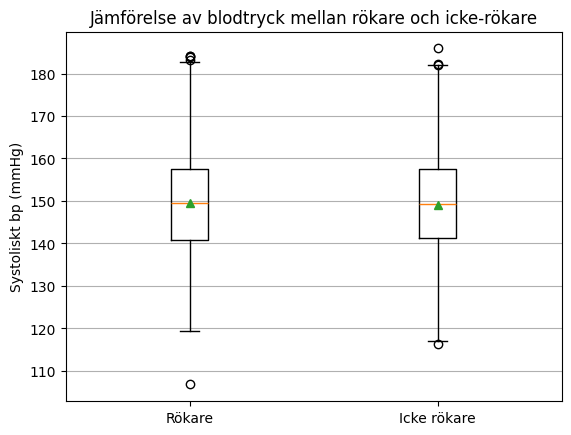

In [10]:

clean = health_study.dropna(subset=["smoker"]).copy()

clean_df = health_study.dropna(subset=["smoker", "systolic_bp"]).copy()

yes = clean.loc[clean.smoker == "Yes", "smoker"].values
no = clean.loc[clean.smoker == "No", "smoker"].values

smokers_bp = clean_df.loc[clean_df["smoker"] == "Yes", "systolic_bp"].values
nonsmokers_bp = clean_df.loc[clean_df["smoker"] == "No", "systolic_bp"].values

t_stat_w, p_val_w = stats.ttest_ind(smokers_bp, nonsmokers_bp , equal_var=False)
print(f"Welch t-test: t = {t_stat_w:.3f}, p = {p_val_w:.4f}")

t_stat, p_value = stats.ttest_ind(smokers_bp, nonsmokers_bp, equal_var=False)

print(f"Welch t-test p-värde: {p_value:.4f}")

fig, ax = plt.subplots()

ax.boxplot([smokers_bp, nonsmokers_bp], showmeans=True)
ax.set_xticklabels(["Rökare", "Icke rökare"])
ax.set_ylabel("Systoliskt bp (mmHg)")
ax.set_title("Jämförelse av blodtryck mellan rökare och icke-rökare")
ax.grid(True, axis="y")
plt.show()

# Hypotesen - Rökare har högre medel-blodtryck än icke-rökare

Welch's t-test utfördes ovan och utifrån ett p värde på 0.6527 (som är mycket högre än 0,05) så finns det inget som stödjer den hypotesen att rökare skulle ha högre blodtryck statistikt sätt.

